In [1]:
# Drive Connection
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 Ben   Classroom   Course   ML-MODELS  'My Drive'   Staj   Tez


In [18]:
#Unzip Dataset
#!tar -xvf "/mydrive/Course/final_project/8hY5ER.tar.gz"

audio  FREESOUNDCREDITS.txt  metadata  spectrograms  UrbanSound8K_README.txt
--2022-10-06 16:23:57--  https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog
Resolving drive.google.com (drive.google.com)... 173.194.218.101, 173.194.218.102, 173.194.218.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog’

1xey3vAVNDjWxnSfhuU     [ <=>                ] 262.94K  --.-KB/s    in 0.1s    

2022-10-06 16:23:58 (1.83 MB/s) - ‘1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog’ saved [269248]



In [42]:
#Libraries
import os
import glob
from PIL import Image 
import PIL 


In [84]:
#get png file name

!cp -r /content/gdrive/MyDrive/Course/final_project/spectrograms/0 /content
png_list = []
for i in range (1):
  for f in glob.glob('/content/0/*.png'):
    png_list.append(os.path.split(f)[-1])
  print(str(i) + " Folder Success") 
print(png_list)

0 Folder Success
['100852-0-0-10.png', '100852-0-0-1.png', '100852-0-0-0.png', '100852-0-0-12.png', '100852-0-0-11.png', '100852-0-0-14.png', '100852-0-0-13.png', '100852-0-0-17.png', '100852-0-0-15.png', '100852-0-0-16.png', '100852-0-0-19.png', '100852-0-0-18.png', '100852-0-0-2.png', '100852-0-0-20.png', '100852-0-0-22.png', '100852-0-0-21.png', '100852-0-0-24.png', '100852-0-0-25.png', '100852-0-0-26.png', '100852-0-0-27.png', '100852-0-0-23.png', '100852-0-0-30.png', '100852-0-0-28.png', '100852-0-0-3.png', '100852-0-0-29.png', '100852-0-0-5.png', '100852-0-0-8.png', '100852-0-0-4.png', '100852-0-0-6.png', '100852-0-0-7.png', '100852-0-0-9.png', '101729-0-0-1.png', '101729-0-0-11.png', '101729-0-0-13.png', '101729-0-0-12.png', '101729-0-0-14.png', '101729-0-0-18.png', '101729-0-0-21.png', '101729-0-0-16.png', '101729-0-0-19.png', '101729-0-0-17.png', '101729-0-0-23.png', '101729-0-0-24.png', '101729-0-0-22.png', '101729-0-0-26.png', '101729-0-0-32.png', '101729-0-0-28.png', '10172

In [94]:
#GrayScale
for i in range (len(png_list)):
  img = Image.open("/content/0/"+str(png_list[i])).convert('L')
  img.save('/content/grayscale/'+str(png_list[i]))

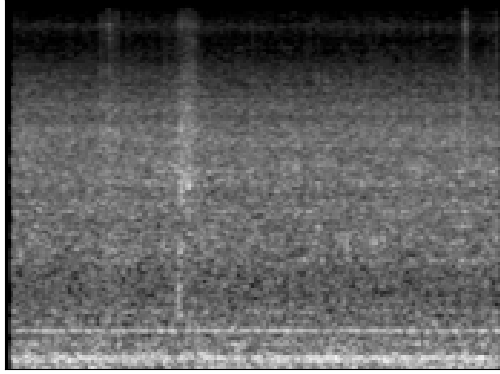

In [95]:
from google.colab.patches import cv2_imshow
import cv2
#Example
gray_img=cv2.imread("/content/grayscale/100852-0-0-0.png")
cv2_imshow(gray_img)


In [102]:
#Resize
for i in range (len(png_list)):
  image = Image.open('/content/grayscale/'+str(png_list[i]))
  print(f"Original size : {image.size}") # 500x374
  resized = image.resize((400, 374))
  print(f"Resized : {resized.size}") # 400x374
  resized.save('/content/resized/'+str(png_list[i]))


Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (400, 374)
Original size : (500, 374)
Resized : (40

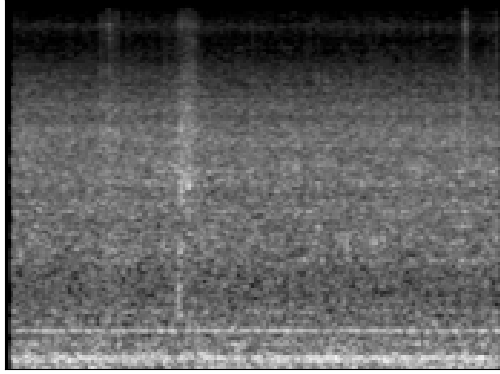

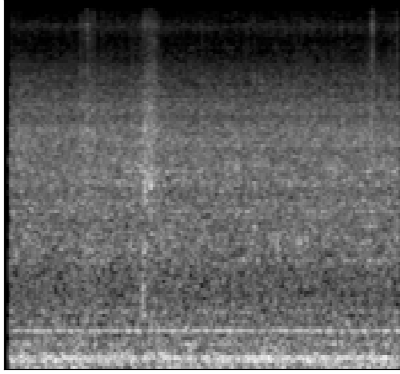

In [103]:
#Example
gray_img=cv2.imread("/content/grayscale/100852-0-0-0.png")
cv2_imshow(gray_img)
resized_img=cv2.imread("/content/resized/100852-0-0-0.png")
cv2_imshow(resized_img)

In [117]:
#Normalization
!ls

for i in range (len(png_list)):
  image = cv2.imread("/resized"+str(png_list[i]), cv2.IMREAD_COLOR)  # uint8 image
  norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


In [123]:
# Basic Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

# Libraries for Classification and building Models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [120]:
#Get .csv Data
df = pd.read_csv("/content/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [121]:
#Label and Feature
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '/content/UrbanSound8K/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [122]:
temp = parser(df)
temp = np.array(temp)
data = temp.transpose()

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [124]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

for i in range(8732):
    X[i] = (X_[i])

Y = to_categorical(Y)

(8732,) (8732,)


In [125]:
print(X)
print(Y)

[[2.69767806e-05 2.21952942e-04 2.99830193e-04 ... 2.18745772e-04
  4.35239554e-06 1.53221535e-07]
 [4.96997461e-02 4.95272391e-02 3.71718816e-02 ... 3.45579956e-08
  9.78166970e-09 6.45950093e-09]
 [3.08491103e-02 2.80201510e-02 3.64435948e-02 ... 1.53248472e-08
  3.88772925e-09 2.68361910e-09]
 ...
 [1.63483080e-02 6.27973080e-02 6.23526797e-02 ... 4.73086266e-06
  3.84619057e-07 1.00699680e-07]
 [2.41801087e-02 7.76229203e-02 6.35382384e-02 ... 1.66276095e-07
  3.09857455e-08 1.72939156e-08]
 [3.62155996e-02 5.45257442e-02 9.47468206e-02 ... 1.16855585e-06
  2.74766620e-07 1.92392292e-07]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [127]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [138]:
#Save Dataset .npy
np.save('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/xtrain.npy', X_train)
np.save('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/ytrain.npy', Y_train)
np.save('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/xtest.npy', X_test)
np.save('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/ytest.npy', Y_test)


#Save Dataset .txt
np.savetxt('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/xtrain.txt', X_train)
np.savetxt('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/ytrain.txt', Y_train)
np.savetxt('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/xtest.txt', X_test)
np.savetxt('/content/gdrive/MyDrive/Course/final_project/train_and_test_dataset/ytest.txt', Y_test)